In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#from plotly.offline import plot
#import plotly.graph_objects as go
#import plotly.express as px

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
#from wordcloud import WordCloud, STOPWORDS

# Read Data

In [2]:
df_post = pd.read_csv('Positive.csv')
df_post.head()

Unnamed: 0                                               text
0           0  dem aide comey letter jason chaffetz tweet dar...
1           2  truth might fire october tension intelligence ...
2           3  videos civilians kill single airstrike identif...
3           4  print iranian woman sentence six prison iran r...
4          12  mystery surround third reich nazi germany stil...

In [3]:
df_neg = pd.read_csv('Negative.csv')
df_neg.head()

Unnamed: 0                                               text
0           1  ever feel life circle roundabout rather head s...
1           5  jackie mason voice reason exclusive clip breit...
2           7  paris france choose idealistic traditional can...
3           9  michael flynn resign security adviser seal pro...
4          10  organize action activist group morph barack pr...

In [4]:
df_neg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10361 entries, 0 to 10360
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10361 non-null  int64 
 1   text        10361 non-null  object
dtypes: int64(1), object(1)
memory usage: 162.0+ KB


In [5]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7924 entries, 0 to 7923
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7924 non-null   int64 
 1   text        7910 non-null   object
dtypes: int64(1), object(1)
memory usage: 123.9+ KB


In [6]:
df_post = df_post.dropna()

# Topic for Negative News

In [7]:
vectorizer = CountVectorizer(stop_words='english')
doc_word = vectorizer.fit_transform(df_neg['text'])
doc_word.shape

(10361, 81007)

In [8]:
pd.DataFrame(doc_word.toarray(), index= df_neg['text'], columns=vectorizer.get_feature_names()).head(10)

aa  aabb  aachen  aadara  \
text                                                                           
ever feel life circle roundabout rather head st...   0     0       0       0   
jackie mason voice reason exclusive clip breitb...   0     0       0       0   
paris france choose idealistic traditional cand...   0     0       0       0   
michael flynn resign security adviser seal prop...   0     0       0       0   
organize action activist group morph barack pre...   0     0       0       0   
bbc produce spoof real housewives tv program co...   0     0       0       0   
guillermo barros schelotto argentine player set...   0     0       0       0   
scandal engulf fargo topple chairman chief exec...   0     0       0       0   
wednesday press conference tower nbc press mode...   0     0       0       0   
screenwriter ryan murphy produce fx series crim...   0     0       0       0   

                                                    aadmi  aadvantage  aag  \
text                                                                         
ever feel life circle roundabout rather head st...      0           0    0   
jackie mason voice reason exclusive clip breitb...      0           0    0   
paris france choose idealistic traditional cand...      0           0    0   
michael flynn resign security adviser seal prop...      0           0    0   
organize action activist group morph barack pre...      0           0    0   
bbc produce spoof real housewives tv program co...      0           0    0   
guillermo barros schelotto argentine player set...      0           0    0   
scandal engulf fargo topple chairman chief exec...      0           0    0   
wednesday press conference tower nbc press mode...      0           0    0   
screenwriter ryan murphy produce fx series crim...      0           0    0   

                                                    aah  aahhh  aaidh  ...  \
text                                                                   ...   
ever feel life circle roundabout rather head st...    0      0      0  ...   
jackie mason voice reason exclusive clip breitb...    0      0      0  ...   
paris france choose idealistic traditional cand...    0      0      0  ...   
michael flynn resign security adviser seal prop...    0      0      0  ...   
organize action activist group morph barack pre...    0      0      0  ...   
bbc produce spoof real housewives tv program co...    0      0      0  ...   
guillermo barros schelotto argentine player set...    0      0      0  ...   
scandal engulf fargo topple chairman chief exec...    0      0      0  ...   
wednesday press conference tower nbc press mode...    0      0      0  ...   
screenwriter ryan murphy produce fx series crim...    0      0      0  ...   

                                                    zwicky  zwiebel  zwigoff  \
text                                                                           
ever feel life circle roundabout rather head st...       0        0        0   
jackie mason voice reason exclusive clip breitb...       0        0        0   
paris france choose idealistic traditional cand...       0        0        0   
michael flynn resign security adviser seal prop...       0        0        0   
organize action activist group morph barack pre...       0        0        0   
bbc produce spoof real housewives tv program co...       0        0        0   
guillermo barros schelotto argentine player set...       0        0        0   
scandal engulf fargo topple chairman chief exec...       0        0        0   
wednesday press conference tower nbc press mode...       0        0        0   
screenwriter ryan murphy produce fx series crim...       0        0        0   

                                                    zwim  zwolenkiewicz  \
text                                                                      
ever feel life circle roundabout rather head st...     0              0   
jackie mason voice reason exclu

### Latent Semantic Analysis (LSA)

In [9]:
lsa = TruncatedSVD(10)
doc_topic = lsa.fit_transform(doc_word)

In [10]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [11]:
display_topics(lsa, vectorizer.get_feature_names(), 30)


Topic  0
government, include, group, campaign, right, report, country, ask, case, police, officials, plan, law, public, vote, force, attack, women, political, accord, republican, lead, administration, add, federal, build, question, issue, security, department

Topic  1
police, officer, shoot, kill, black, game, dr, life, children, mother, attack, men, arrest, young, drug, die, force, students, father, gun, video, case, body, feel, car, death, train, hospital, night, islamic

Topic  2
police, officials, attack, officer, government, russia, report, security, military, russian, islamic, force, kill, syria, department, administration, intelligence, china, foreign, north, investigation, arrest, group, korea, justice, general, statement, syrian, shoot, law

Topic  3
police, officer, vote, republican, campaign, black, republicans, shoot, democrats, voters, law, justice, judge, senate, election, case, senator, democratic, gun, right, poll, ryan, women, hear, breitbart, twitter, department, ra

### Non-Negative Matrix Factorization (NMF)


In [12]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(doc_word)

/Users/User/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [13]:
display_topics(nmf_model, vectorizer.get_feature_names(), 30)


Topic  0
women, life, children, black, ask, feel, right, book, mother, young, old, build, talk, father, love, really, little, open, parent, include, things, men, film, lot, woman, room, speak, small, read, sit

Topic  1
vote, campaign, republican, republicans, democrats, voters, election, democratic, senate, political, senator, poll, ryan, win, presidential, candidate, race, sanders, conservative, right, country, nominee, care, washington, issue, health, women, speak, lead, candidates

Topic  2
force, attack, government, islamic, military, group, syria, war, kill, country, saudi, security, fight, syrian, officials, iraq, turkey, bomb, strike, include, nations, afghanistan, taliban, countries, afghan, european, rebel, troop, castro, minister

Topic  3
police, officer, shoot, kill, attack, black, gun, arrest, report, department, video, chief, london, charge, scott, case, release, crime, car, enforcement, murder, drug, suspect, gang, violence, street, force, stop, men, protest

Topic  4


In [14]:
VT = pd.DataFrame(doc_topic.round(5),
             index = df_neg['text'],
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6",
                       "component_7","component_8","component_9","component_10"])
VT

component_1  component_2  \
text                                                                           
ever feel life circle roundabout rather head st...      0.13792      0.17134   
jackie mason voice reason exclusive clip breitb...      0.02600      0.01507   
paris france choose idealistic traditional cand...      0.04595      0.32343   
michael flynn resign security adviser seal prop...      0.04933      0.07039   
organize action activist group morph barack pre...      0.11868      0.22822   
...                                                         ...          ...   
suicide bombers attack bus station jakarta wedn...      0.00000      0.00000   
twitter friday praise vladimir putin decision d...      0.00000      0.00000   
rapper unload black celebrities election fail c...      0.05602      0.05754   
green bay packers lose washington redskins drop...      0.00000      0.08878   
macy today grow union several name retail inclu...      0.11663      0.00000   

                                                    component_3  component_4  \
text                                                                           
ever feel life circle roundabout rather head st...      0.00000      0.00149   
jackie mason voice reason exclusive clip breitb...      0.01895      0.00056   
paris france choose idealistic traditional cand...      0.09438      0.00000   
michael flynn resign security adviser seal prop...      0.13613      0.00000   
organize action activist group morph barack pre...      0.19948      0.03992   
...                                                         ...          ...   
suicide bombers attack bus station jakarta wedn...      0.34029      0.42394   
twitter friday praise vladimir putin decision d...      0.00000      0.00000   
rapper unload black celebrities election fail c...      0.00000      0.03820   
green bay packers lose washington redskins drop...      0.04053      0.02070   
macy today grow union several name retail inclu...      0.00000      0.01816   

                                                    component_5  component_6  \
text                                                                           
ever feel life circle roundabout rather head st...      0.00000      0.00000   
jackie mason voice reason exclusive clip breitb...      0.00000      0.06961   
paris france choose idealistic traditional cand...      0.09518      0.00676   
michael flynn resign security adviser seal prop...      0.21733      0.00000   
organize action activist group morph barack pre...      0.18501      0.00000   
...                                                         ...          ...   
suicide bombers attack bus station jakarta wedn...      0.00000      0.00000   
twitter friday praise vladimir putin decision d...      0.00483      0.00000   
rapper unload black celebrities election fail c...      0.00000      0.00000   
green bay packers lose washington redskins drop...      0.02331      0.02313   
macy today grow union several name retail inclu...      0.30563      0.03197   

                                                    component_7  component_8  \
text                                                                           
ever feel life circle roundabout rather head st...      0.03051      0.00000   
jackie mason voice reason exclusive clip breitb...      0.00000      0.02140   
paris france choose idealistic traditional cand...      0.00000      0.04644   
michael flynn resign security adviser seal prop...      1.09843      0.00000   
organize action activist group morph barack pre...      0.40715      0.00000   
...                                                         ...          ...   
suicide bombers attack bus station jakarta wedn...      0.00000      0.00000   
twitter friday praise vladimir putin decision d...      0.63336      0.00000   
rapper unload black celebrities election fail c...      0.00964      0.00524   
green bay packers lose washington redskins drop..

## Approve The Model

In [15]:
topics_Neg = pd.DataFrame(doc_topic, columns = ['Childern Rights', 'Election','Military Strategy',
                                                 'Economy','Crime and Cases','Diseases','Campaign',
                                                 'Trade and Policy','Law','Feminism'])
topics_Neg['main_topic'] = topics_Neg.idxmax(axis=1)
topics_Neg['text'] = df_neg['text']



In [16]:
topics_Neg.sample(10)


Childern Rights  Election  Military Strategy   Economy  Crime and Cases  \
1791         0.000000  0.010158           0.000000  0.002684         0.000000   
509          0.011718  0.022811           0.316588  0.000000         0.000000   
335          0.000000  0.015848           0.102736  0.526658         0.012953   
6264         0.231235  0.000000           0.065925  0.000000         0.260166   
3471         0.185826  0.000000           0.032915  0.099964         0.040442   
2483         0.106480  0.202387           0.017869  0.000772         0.130868   
7600         0.145395  0.014548           0.509699  0.043975         0.000000   
7207         0.026571  0.000000           0.009889  0.001580         0.013597   
4217         0.035726  0.000000           0.000000  0.000000         0.131235   
4863         0.035835  0.006873           0.000000  0.000000         0.002723   

      Diseases  Campaign  Trade and Policy       Law  Feminism  \
1791  0.000000  0.052874          0.000000  0.000000  0.000000   
509   0.000000  0.000000          0.025114  0.000000  0.000000   
335   0.000000  0.035152          0.000000  0.018799  0.000000   
6264  1.100988  0.119553          0.007114  0.001428  0.057550   
3471  0.011027  0.013319          0.043460  0.110897  0.000000   
2483  0.000000  0.000000          0.000000  0.838874  0.334220   
7600  0.000000  0.000000          0.000000  0.022086  0.073445   
7207  0.008539  0.200479          0.004443  0.027017  0.000000   
4217  0.000000  0.231436          0.003999  0.040810  0.068090   
4863  0.000000  0.151203          0.000000  0.007956  0.155020   

             main_topic                                               text  
1791           Campaign  cnn anchor jake tapper react chief strategist ...  
509   Military Strategy  encrypt chat room islamic sympathizers militan...  
335             Economy  strict french gun control extremely difficult ...  
6264           Diseases  second series installment note distant past ch...  
3471    Childern Rights  something experience drive though may admit ca...  
2483                Law  judith katherine dun wait anxiously california...  
7600  Military Strategy  washington young men catch culture sons immigr...  
7207           Campaign  release footage robot fire handguns target rus...  
4217           Campaign  smart tv manufacturer vizio force pay settleme...  
4863           Feminism  lawyer roger ail chairman fox send letter maga...

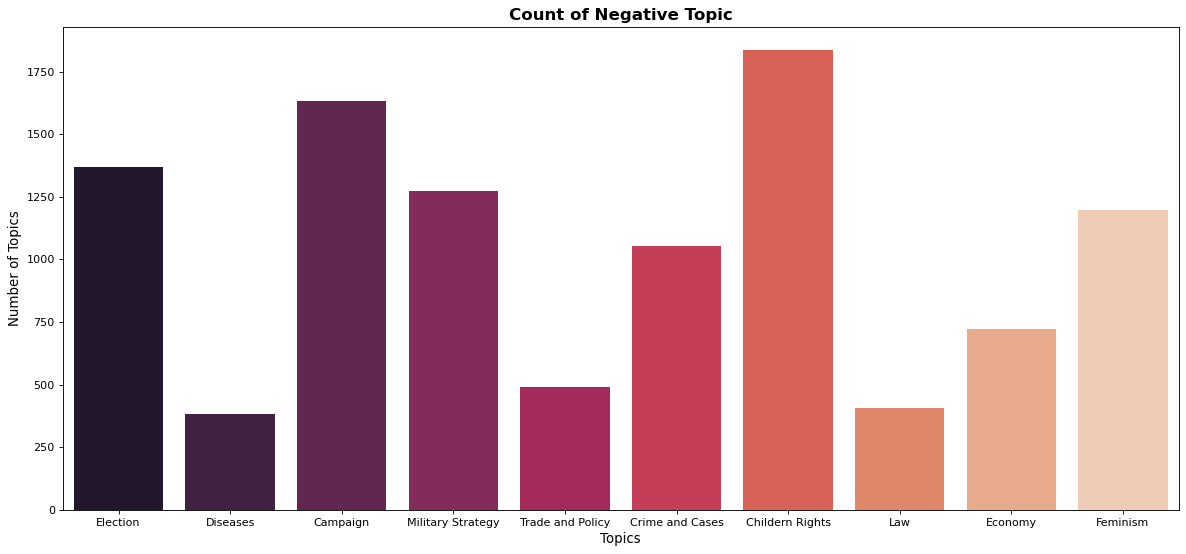

In [17]:
plt.figure(figsize=(18, 8), dpi=80)

Gender_col = sns.countplot(x="main_topic", data=topics_Neg, palette="rocket")
Gender_col.set_ylabel('Number of Topics', size= 12) 
Gender_col.set_xlabel('Topics', size= 12)
Gender_col.set_title('Count of Negative Topic', weight = 'bold', size =15);
plt.savefig('Negative Topic')

In [18]:
from sklearn.manifold import TSNE
tsne= TSNE(n_components=2, random_state=0, verbose=0)
tsne_result= tsne.fit_transform(doc_topic)
topics_Neg['X_tsne'] =tsne_result[:, 0]
topics_Neg['Y_tsne'] =tsne_result[:, 1]

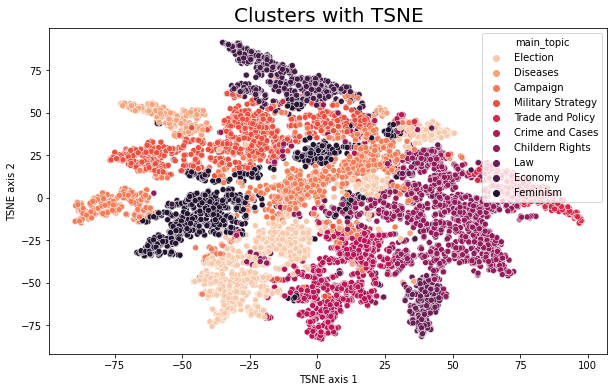

In [19]:
plt.figure(figsize=(10,6))
plt.title("Clusters with TSNE", fontsize=20)
plt.xlabel('TSNE axis 1')
plt.ylabel('TSNE axis 2')

sns.scatterplot(
    x="X_tsne", y="Y_tsne",
    hue=topics_Neg['main_topic'],
    palette=sns.color_palette("rocket_r", 10),
    data=topics_Neg,
    legend="full"
);

# WordCloud

In [20]:
from wordcloud import WordCloud 

def get_word_freq(topic, model, n_top_words, vocab):
    """
    This method will be called to count the most frequent words in specific topic.
    """
 
    word_dict = {};
    freq = sorted(model.components_[topic])[:-n_top_words - 1: -1]
    words_ids = model.components_[topic].argsort()[:-n_top_words - 1:-1]
    words = [vocab[key] for key in words_ids]
    for i in range(n_top_words):
        word_dict[words[i]] = freq[i]

    
    return word_dict

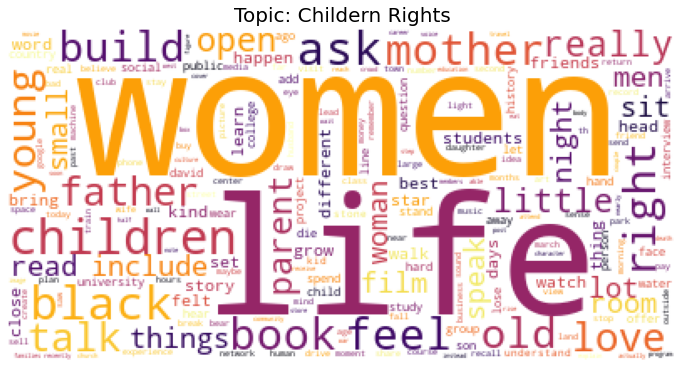

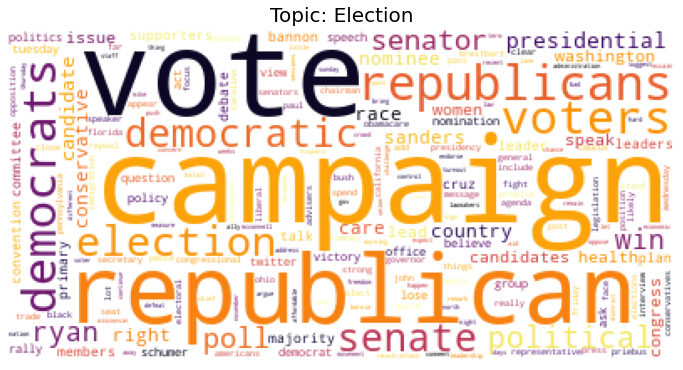

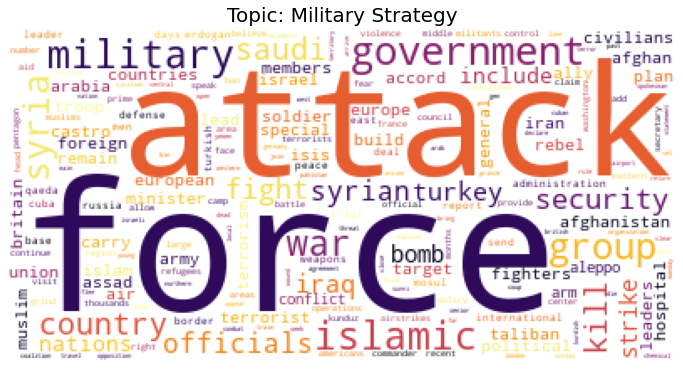

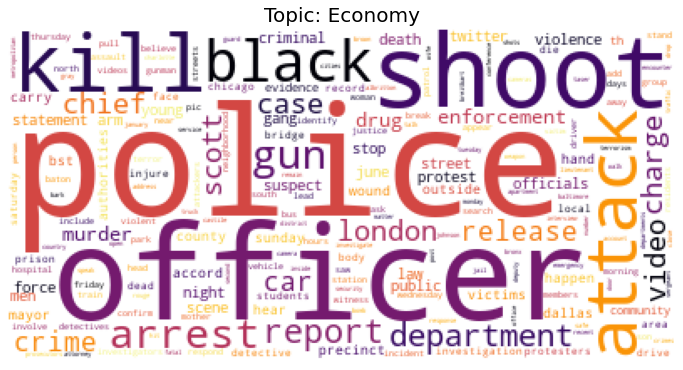

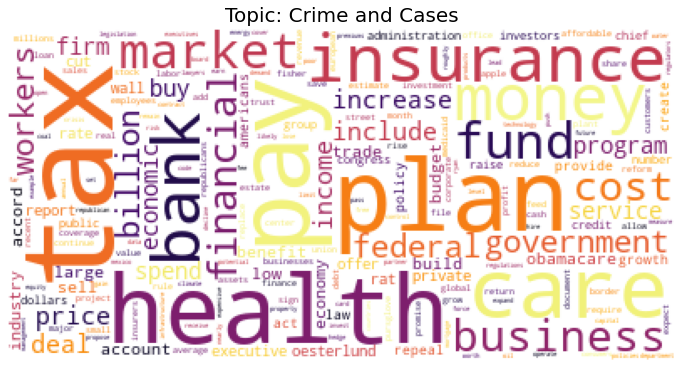

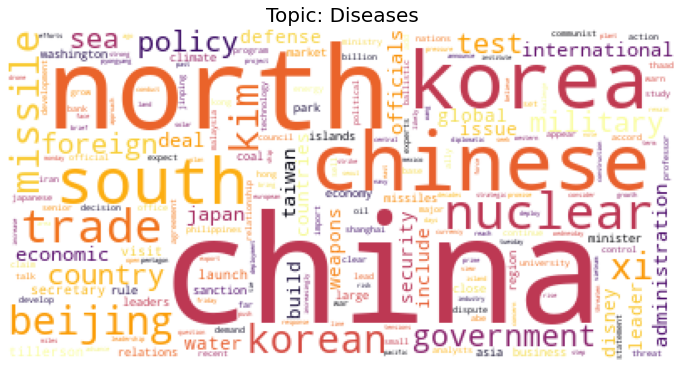

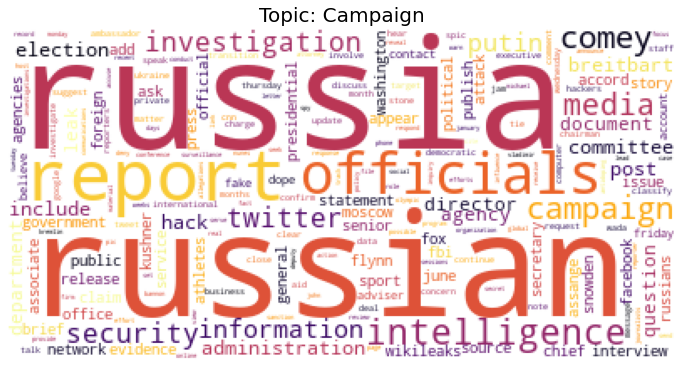

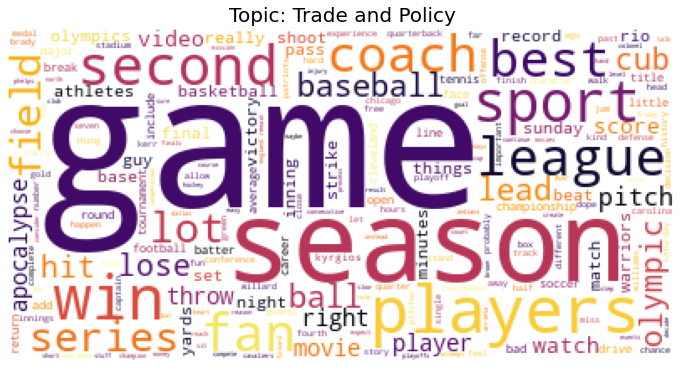

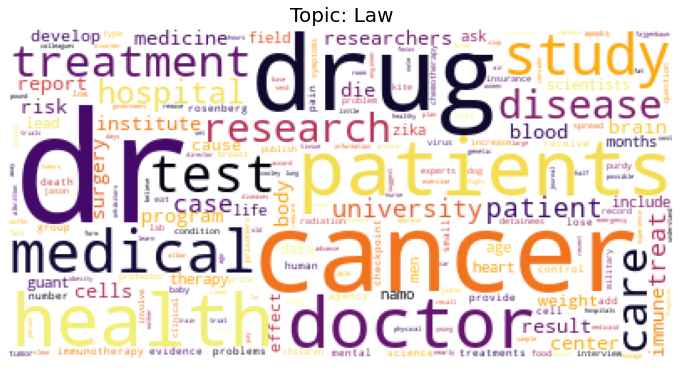

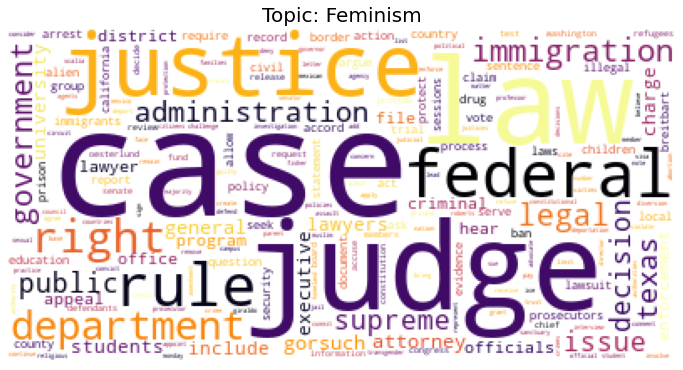

In [21]:
vocab=vectorizer.get_feature_names()
list_of_topics= ['Childern Rights', 'Election','Military Strategy',
                 'Economy','Crime and Cases','Diseases','Campaign',
                 'Trade and Policy','Law','Feminism']
for topic in range(10):
    plt.figure(figsize = (12,14))
    plt.imshow(WordCloud(background_color='white', colormap=plt.cm.inferno).fit_words(dict(get_word_freq(topic, nmf_model, 200, vocab))))
    plt.axis('off')
    plt.title('Topic: ' + list_of_topics[topic], size=20)
    plt.show();

# Topic for Positive News

In [22]:
df_post.head()

Unnamed: 0                                               text
0           0  dem aide comey letter jason chaffetz tweet dar...
1           2  truth might fire october tension intelligence ...
2           3  videos civilians kill single airstrike identif...
3           4  print iranian woman sentence six prison iran r...
4          12  mystery surround third reich nazi germany stil...

In [23]:
vectorizer = CountVectorizer(stop_words='english')
doc_word = vectorizer.fit_transform(df_post['text'])
doc_word.shape

(7910, 83990)

In [24]:
pd.DataFrame(doc_word.toarray(), index= df_post['text'], columns=vectorizer.get_feature_names()).head(10)

aa  aaah  aab  aac  \
text                                                                     
dem aide comey letter jason chaffetz tweet darr...   0     0    0    0   
truth might fire october tension intelligence a...   0     0    0    0   
videos civilians kill single airstrike identify...   0     0    0    0   
print iranian woman sentence six prison iran re...   0     0    0    0   
mystery surround third reich nazi germany still...   0     0    0    0   
campaign demand fbi affirm russia tie election ...   0     0    0    0   
yes pay government troll social media blog foru...   0     0    0    0   
caddo nation tribal leader free spend days behi...   0     0    0    0   
fbi close post home headline world fbi close se...   0     0    0    0   
historic move nations committee vote thursday c...   0     0    0    0   

                                                    aachen  aadmi  aae  aaeeb  \
text                                                                            
dem aide comey letter jason chaffetz tweet darr...       0      0    0      0   
truth might fire october tension intelligence a...       0      0    0      0   
videos civilians kill single airstrike identify...       0      0    0      0   
print iranian woman sentence six prison iran re...       0      0    0      0   
mystery surround third reich nazi germany still...       0      0    0      0   
campaign demand fbi affirm russia tie election ...       0      0    0      0   
yes pay government troll social media blog foru...       0      0    0      0   
caddo nation tribal leader free spend days behi...       0      0    0      0   
fbi close post home headline world fbi close se...       0      0    0      0   
historic move nations committee vote thursday c...       0      0    0      0   

                                                    aaib  aaii  ...  zxua  \
text                                                            ...         
dem aide comey letter jason chaffetz tweet darr...     0     0  ...     0   
truth might fire october tension intelligence a...     0     0  ...     0   
videos civilians kill single airstrike identify...     0     0  ...     0   
print iranian woman sentence six prison iran re...     0     0  ...     0   
mystery surround third reich nazi germany still...     0     0  ...     0   
campaign demand fbi affirm russia tie election ...     0     0  ...     0   
yes pay government troll social media blog foru...     0     0  ...     0   
caddo nation tribal leader free spend days behi...     0     0  ...     0   
fbi close post home headline world fbi close se...     0     0  ...     0   
historic move nations committee vote thursday c...     0     0  ...     0   

                                                    zxycmwjdxj  zy  \
text                                                                 
dem aide comey letter jason chaffetz tweet darr...           0   0   
truth might fire october tension intelligence a...           0   0   
videos civilians kill single airstrike identify...           0   0   
print iranian woman sentence six prison iran re...           0   0   
mystery surround third reich nazi germany still...           0   0   
campaign demand fbi affirm russia tie election ...           0   0   
yes pay government troll social media blog foru...           0   0   
caddo nation tribal leader free spend days behi...           0   0   
fbi close post home headline world fbi close se...           0   0   
historic move nations committee vote thursday c...           0   0   

                                                    zybvwqhlbctginctv  \
text                                                                    
dem aide comey letter jason chaffetz tweet darr...                  0   
truth might fire october tension intelligence a...                  0   
videos civilians kill single airstrike identify...                  0   
print iranian woman sentence six prison iran re...         

### Latent Semantic Analysis (LSA)

In [25]:
lsa = TruncatedSVD(10)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.07671075, 0.02407727, 0.01970343, 0.0163945 , 0.01507241,
       0.01302641, 0.01140244, 0.01070501, 0.01004766, 0.00946314])

In [26]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [27]:
display_topics(lsa, vectorizer.get_feature_names(), 30)


Topic  0
know, government, war, world, new, right, country, money, vote, russia, pay, election, media, force, change, bad, report, believe, happen, bank, god, political, place, americans, job, life, really, include, military, control

Topic  1
money, bank, debt, pay, reserve, federal, gold, government, tax, california, job, currency, create, economy, water, value, problem, loan, dollar, food, dollars, supply, credit, hard, feed, bad, financial, spend, really, buy

Topic  2
war, bank, money, debt, russia, government, gold, syria, reserve, federal, military, russian, syrian, currency, pay, foreign, financial, policy, jewish, force, arab, china, value, attack, nuclear, create, international, iraq, nato, note

Topic  3
jewish, arab, arabs, morris, jews, palestine, water, israel, land, zionist, california, cleanse, god, ethnic, population, expel, country, plan, haganah, war, villages, home, place, gurion, ben, world, british, palestinian, order, palestinians

Topic  4
jewish, fbi, election

### Non-Negative Matrix Factorization (NMF)

In [28]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(doc_word)

/Users/User/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [29]:
display_topics(nmf_model, vectorizer.get_feature_names(), 30)


Topic  0
government, country, pay, job, tax, know, money, hard, family, americans, food, michael, bad, welfare, care, things, right, world, place, lot, free, really, california, month, economy, let, life, home, countries, big

Topic  1
money, bank, debt, reserve, gold, federal, pay, government, create, currency, value, financial, supply, dollar, dollars, world, market, control, feed, central, loan, credit, economy, paper, note, issue, deposit, congress, trillion, national

Topic  2
war, russia, syria, military, russian, government, world, force, syrian, nuclear, attack, foreign, iraq, nato, policy, western, china, media, putin, political, group, country, aleppo, east, iran, assad, international, washington, arm, weapons

Topic  3
jewish, arab, arabs, morris, jews, palestine, israel, zionist, war, land, cleanse, plan, ethnic, expel, order, haganah, population, villages, british, ben, gurion, attack, palestinian, policy, force, transfer, home, palestinians, note, zionists

Topic  4
fbi,

In [30]:
VT = pd.DataFrame(doc_topic.round(6),
             index = df_post['text'],
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6",
                       "component_7","component_8","component_9","component_10"])
VT

component_1  component_2  \
text                                                                           
dem aide comey letter jason chaffetz tweet darr...     0.057873     0.000000   
truth might fire october tension intelligence a...     0.051220     0.000000   
videos civilians kill single airstrike identify...     0.000000     0.000000   
print iranian woman sentence six prison iran re...     0.000000     0.000000   
mystery surround third reich nazi germany still...     0.000000     0.005433   
...                                                         ...          ...   
google pinterest digg linkedin reddit stumbleup...     0.000000     0.000000   
lawyer keep campaign chief jail doj probe novem...     0.000000     0.000000   
share although vandal cool destroy hollywood st...     0.032021     0.033930   
nato russia hold parallel exercise balkans pres...     0.000000     0.000000   
david swanson author activist journalist radio ...     0.023485     0.089642   

                                                    component_3  component_4  \
text                                                                           
dem aide comey letter jason chaffetz tweet darr...     0.000000     0.000000   
truth might fire october tension intelligence a...     0.351829     0.047552   
videos civilians kill single airstrike identify...     0.122970     0.016077   
print iranian woman sentence six prison iran re...     0.002053     0.002953   
mystery surround third reich nazi germany still...     0.253859     0.009662   
...                                                         ...          ...   
google pinterest digg linkedin reddit stumbleup...     0.000000     0.000000   
lawyer keep campaign chief jail doj probe novem...     0.000000     0.000000   
share although vandal cool destroy hollywood st...     0.000000     0.011332   
nato russia hold parallel exercise balkans pres...     0.291090     0.000000   
david swanson author activist journalist radio ...     0.251758     0.018904   

                                                    component_5  component_6  \
text                                                                           
dem aide comey letter jason chaffetz tweet darr...     0.515558     0.000000   
truth might fire october tension intelligence a...     0.143234     0.000000   
videos civilians kill single airstrike identify...     0.002303     0.045069   
print iranian woman sentence six prison iran re...     0.037690     0.000000   
mystery surround third reich nazi germany still...     0.000000     0.003938   
...                                                         ...          ...   
google pinterest digg linkedin reddit stumbleup...     0.000000     0.000000   
lawyer keep campaign chief jail doj probe novem...     0.541347     0.000000   
share although vandal cool destroy hollywood st...     0.041510     0.008987   
nato russia hold parallel exercise balkans pres...     0.000000     0.036851   
david swanson author activist journalist radio ...     0.031160     0.005003   

                                                    component_7  component_8  \
text                                                                           
dem aide comey letter jason chaffetz tweet darr...     0.099504     0.000000   
truth might fire october tension intelligence a...     0.033549     0.000000   
videos civilians kill single airstrike identify...     0.000000     0.000000   
print iranian woman sentence six prison iran re...     0.000000     0.000000   
mystery surround third reich nazi germany still...     0.000000     0.011402   
...                                                         ...          ...   
google pinterest digg linkedin reddit stumbleup...     1.100339     0.000000   
lawyer keep campaign chief jail doj probe novem...     0.000000     0.000000   
share although vandal cool destroy hollywood st...     0.031421     0.047942   
nato russia hold parallel exercise balkans pres..

### Latent Dirichlet Allocation (LDA)

In [31]:
# Transpose it so the terms are the rows
doc_words = vectorizer.transform(df_post['text']).transpose()

pd.DataFrame(doc_words.toarray(), vectorizer.get_feature_names())


0     1     2     3     4     5     6     7     8     \
aa                       0     0     0     0     0     0     0     0     0   
aaah                     0     0     0     0     0     0     0     0     0   
aab                      0     0     0     0     0     0     0     0     0   
aac                      0     0     0     0     0     0     0     0     0   
aachen                   0     0     0     0     0     0     0     0     0   
...                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
zylinderkopfdichtung     0     0     0     0     0     0     0     0     0   
zytsov                   0     0     0     0     0     0     0     0     0   
zyuganov                 0     0     0     0     0     0     0     0     0   
zyzs                     0     0     0     0     0     0     0     0     0   
zz                       0     0     0     0     0     0     0     0     0   

                      9     ...  7900  7901  7902  7903  7904  7905  7906  \
aa                       0  ...     0     0     0     0     0     0     0   
aaah                     0  ...     0     0     0     0     0     0     0   
aab                      0  ...     0     0     0     0     0     0     0   
aac                      0  ...     0     0     0     0     0     0     0   
aachen                   0  ...     0     0     0     0     0     0     0   
...                    ...  ...   ...   ...   ...   ...   ...   ...   ...   
zylinderkopfdichtung     0  ...     0     0     0     0     0     0     0   
zytsov                   0  ...     0     0     0     0     0     0     0   
zyuganov                 0  ...     0     0     0     0     0     0     0   
zyzs                     0  ...     0     0     0     0     0     0     0   
zz                       0  ...     0     0     0     0     0     0     0   

                      7907  7908  7909  
aa                       0     0     0  
aaah                     0     0     0  
aab                      0     0     0  
aac                      0     0     0  
aachen                   0     0     0  
...                    ...   ...   ...  
zylinderkopfdichtung     0     0     0  
zytsov                   0     0     0  
zyuganov                 0     0     0  
zyzs                     0     0     0  
zz                       0     0     0  

[83990 rows x 7910 columns]

In [32]:
from gensim import models, matutils
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_words)

In [33]:
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [34]:
len(id2word)

83990

In [35]:
lda = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=5)

In [36]:
lda.print_topics()

[(0,
  '0.005*"police" + 0.004*"israel" + 0.004*"government" + 0.004*"report" + 0.003*"jewish" + 0.003*"case" + 0.003*"new" + 0.003*"force" + 0.003*"court" + 0.003*"law"'),
 (1,
  '0.007*"election" + 0.007*"vote" + 0.005*"campaign" + 0.005*"new" + 0.004*"fbi" + 0.004*"media" + 0.004*"know" + 0.004*"political" + 0.003*"government" + 0.003*"right"'),
 (2,
  '0.006*"health" + 0.005*"food" + 0.004*"study" + 0.004*"water" + 0.003*"cancer" + 0.003*"cause" + 0.003*"body" + 0.003*"medical" + 0.002*"plant" + 0.002*"eat"'),
 (3,
  '0.008*"war" + 0.007*"russia" + 0.005*"syria" + 0.005*"military" + 0.004*"world" + 0.004*"russian" + 0.004*"force" + 0.004*"government" + 0.003*"new" + 0.003*"attack"'),
 (4,
  '0.006*"know" + 0.006*"world" + 0.005*"life" + 0.004*"die" + 0.004*"love" + 0.004*"man" + 0.004*"god" + 0.003*"women" + 0.003*"feel" + 0.003*"things"')]

### CorEx model

In [37]:
from corextopic import corextopic as ct
words = list(np.asarray(vectorizer.get_feature_names()))
topic_model = ct.Corex(n_hidden=6, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=df_post)

In [38]:
topics = topic_model.get_topics()
#for n,topic in enumerate(topics):
 #3   topic_words,_ = zip(*topic)
   # print('{}: '.format(n) + ','.join(topic_words))
topics

[[('world', 0.14622215737115754, 1.0),
  ('government', 0.12378184638528841, 1.0),
  ('war', 0.11684403904324511, 1.0),
  ('create', 0.11542052761457919, 1.0),
  ('know', 0.11538476201651662, 1.0),
  ('include', 0.11412441969924567, 1.0),
  ('control', 0.11168722277422141, 1.0),
  ('political', 0.10995760266880936, 1.0),
  ('fact', 0.10961816671648619, 1.0),
  ('order', 0.10782144030439048, 1.0)],
 [('si', 0.027616894673746097, 1.0),
  ('este', 0.026242186879828773, 1.0),
  ('im', 0.023338452960637298, 1.0),
  ('und', 0.02231807084215591, 1.0),
  ('das', 0.020878847971937804, 1.0),
  ('den', 0.020874332295453157, 1.0),
  ('auf', 0.0203791669415863, 1.0),
  ('sich', 0.02007425397874692, 1.0),
  ('er', 0.020057317567145273, 1.0),
  ('ein', 0.01973439494793462, 1.0)],
 [('life', 0.09292805192008227, 1.0),
  ('cause', 0.08549720644249778, 1.0),
  ('study', 0.07913423044826023, 1.0),
  ('form', 0.07480725625286902, 1.0),
  ('body', 0.07267118717056259, 1.0),
  ('human', 0.07215053104731811,

In [39]:
topics = topic_model.get_topics()

In [40]:
#topic_model.get_top_docs(topic=4, n_docs=7)

After applying some models, the best topics results are with NMF model.

## Approve The Model


In [41]:
topics_Post = pd.DataFrame(doc_topic, columns = ['Taxs ','Financial','Wars','israel','Laws','Study',
                                                 'Election','Climate','Faith','Policy'])
topics_Post['main_topic'] = topics_Post.idxmax(axis=1)
topics_Post['text'] = df_post['text']


In [42]:
topics_Post.sample(10)

Taxs   Financial      Wars    israel      Laws     Study  Election  \
5325  0.000000   0.000000  0.000000  0.000000  0.005215  0.000000  0.011468   
2224  0.023876   0.008035  0.000000  0.003188  0.076026  0.003393  0.015372   
4398  0.054939   0.000000  0.000000  0.000000  0.034335  0.000000  0.077704   
496   0.015719   0.001820  0.000000  0.000000  0.078650  0.000000  0.009495   
7417  0.006231   0.000000  0.007078  0.000000  0.022503  0.000000  0.024344   
5997  0.144208   0.021812  0.038366  0.000000  0.218080  0.000000  0.055569   
474   0.274994   0.152820  0.486895  0.000000  0.176560  0.000000  0.295281   
5977  0.009123   0.004874  0.000000  0.000000  0.000000  0.000000  0.000000   
7444  0.068590   0.000000  1.325560  0.000000  0.000000  0.000000  0.000000   
1246  0.000000   0.019381  0.105653  0.024757  0.062165  0.018727  0.338436   

       Climate     Faith    Policy main_topic  \
5325  0.000000  0.000000  0.079552     Policy   
2224  0.011934  0.055736  0.023105       Laws   
4398  0.331753  0.229219  0.072282    Climate   
496   0.000000  0.054221  0.026815       Laws   
7417  0.008280  0.066925  0.001262      Faith   
5997  0.000000  0.231931  0.120275      Faith   
474   0.000000  0.000000  0.322252       Wars   
5977  0.010346  0.001367  0.003461    Climate   
7444  0.000000  0.234054  0.193602       Wars   
1246  0.001059  0.048181  0.000000   Election   

                                                   text  
5325  within preparedness community tendency individ...  
2224  criminal minions catch push voter fraud elect ...  
4398  seattle happen seattle environment reporter ly...  
496   renaissance october share birth nation bomb we...  
7417  reason unknown canadians unable access raynard...  
5997  post eddie millions around world constantly de...  
474   stake election paul craig roberts presstitutes...  
5977  meet secretary send million check iran october...  
7444  un soltero alcanza primer ochomil ropa amonton...  
1246  islamic jihadi decide vehicle attack veteran s...

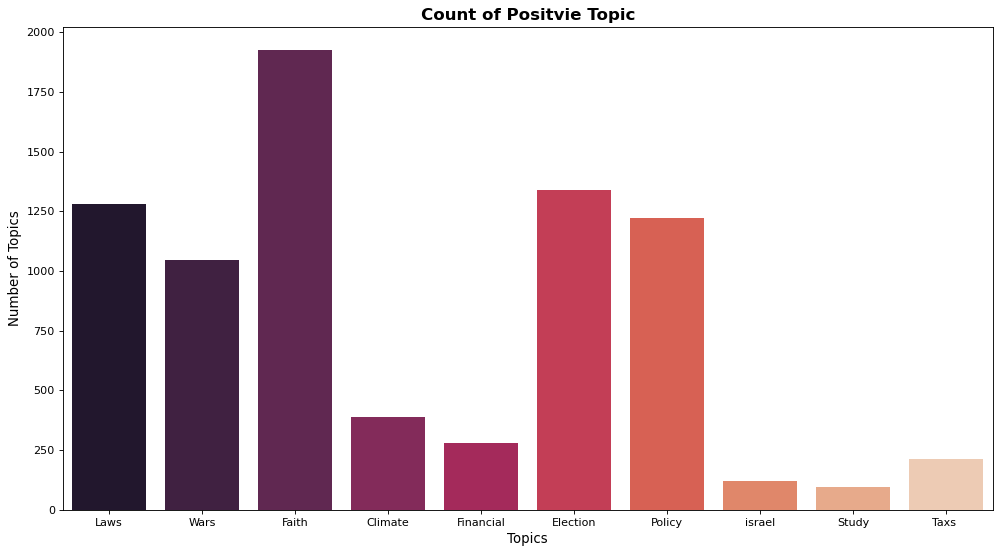

In [43]:
plt.figure(figsize=(15, 8), dpi=80)

Gender_col = sns.countplot(x="main_topic", data=topics_Post, palette="rocket")
Gender_col.set_ylabel('Number of Topics', size= 12) 
Gender_col.set_xlabel('Topics', size= 12)
Gender_col.set_title('Count of Positvie Topic', weight = 'bold', size =15);
plt.savefig('Positvie Topic')

# Visualize TSNE

In [44]:
from sklearn.manifold import TSNE
tsne= TSNE(n_components=2, random_state=0, verbose=0)
tsne_result= tsne.fit_transform(doc_topic)

In [45]:
topics_Post['X_tsne'] =tsne_result[:, 0]
topics_Post['Y_tsne'] =tsne_result[:, 1]

In [46]:
topics_Post

Taxs   Financial      Wars    israel      Laws     Study  Election  \
0     0.057873   0.000000  0.000000  0.000000  0.515558  0.000000  0.099504   
1     0.051220   0.000000  0.351829  0.047552  0.143234  0.000000  0.033549   
2     0.000000   0.000000  0.122970  0.016077  0.002303  0.045069  0.000000   
3     0.000000   0.000000  0.002053  0.002953  0.037690  0.000000  0.000000   
4     0.000000   0.005433  0.253859  0.009662  0.000000  0.003938  0.000000   
...        ...        ...       ...       ...       ...       ...       ...   
7905  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  1.100339   
7906  0.000000   0.000000  0.000000  0.000000  0.541347  0.000000  0.000000   
7907  0.032021   0.033930  0.000000  0.011332  0.041510  0.008987  0.031421   
7908  0.000000   0.000000  0.291090  0.000000  0.000000  0.036851  0.000000   
7909  0.023485   0.089642  0.251758  0.018904  0.031160  0.005003  0.000000   

       Climate     Faith    Policy main_topic  \
0     0.000000  0.150221  0.000000       Laws   
1     0.000000  0.169579  0.089144       Wars   
2     0.000000  0.179690  0.000000      Faith   
3     0.000000  0.045425  0.024580      Faith   
4     0.011402  0.077267  0.017776       Wars   
...        ...       ...       ...        ...   
7905  0.000000  0.000000  0.000000   Election   
7906  0.000000  0.000000  0.000000       Laws   
7907  0.047942  0.218799  0.006112      Faith   
7908  0.000000  0.000000  0.000000       Wars   
7909  0.098500  0.154509  0.224846       Wars   

                                                   text     X_tsne     Y_tsne  
0     dem aide comey letter jason chaffetz tweet dar... -59.308098  28.083273  
1     truth might fire october tension intelligence ...  52.810188  26.735582  
2     videos civilians kill single airstrike identif... -35.029041  -5.281617  
3     print iranian woman sentence six prison iran r...  -4.429807 -48.243469  
4     mystery surround third reich nazi germany stil...  58.780148  21.709982  
...                                                 ...        ...        ...  
7905  drug substance abuse ruin substance addiction ...   0.728424  79.546387  
7906  doctor prescribe deadly opioid pain relate iss... -68.143547  28.973394  
7907  forget man decide presidential election persua... -47.228848 -30.525698  
7908  chart restaurant performance index head south ...  65.485451  24.459826  
7909  brandon turbeville anti fluoridation activists...  51.726383  23.848381  

[7910 rows x 14 columns]

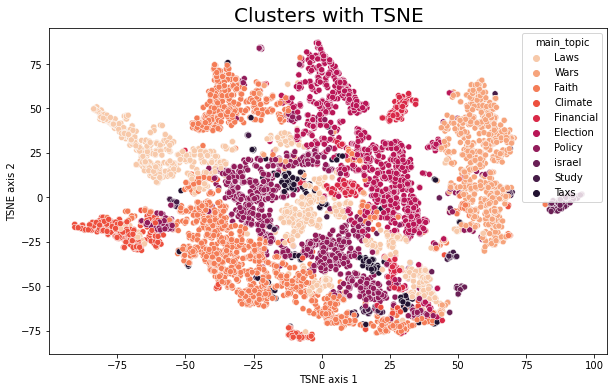

In [47]:
plt.figure(figsize=(10,6))
plt.title("Clusters with TSNE", fontsize=20)
plt.xlabel('TSNE axis 1')
plt.ylabel('TSNE axis 2')

sns.scatterplot(
    x="X_tsne", y="Y_tsne",
    hue=topics_Post['main_topic'],
    palette=sns.color_palette("rocket_r", 10),
    data=topics_Post,
    legend="full"
);


# WordCloud

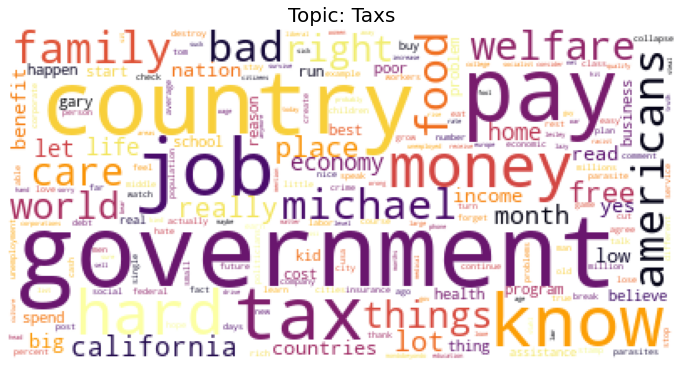

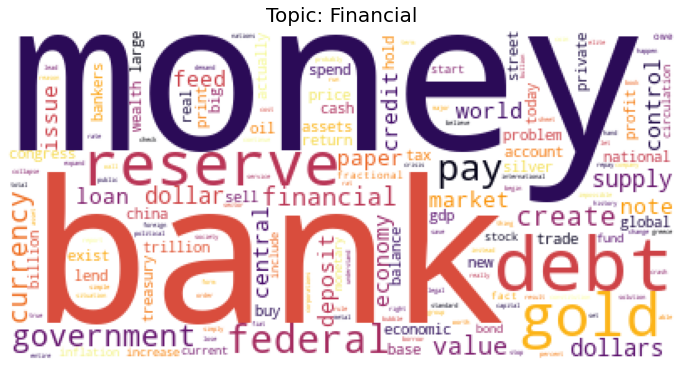

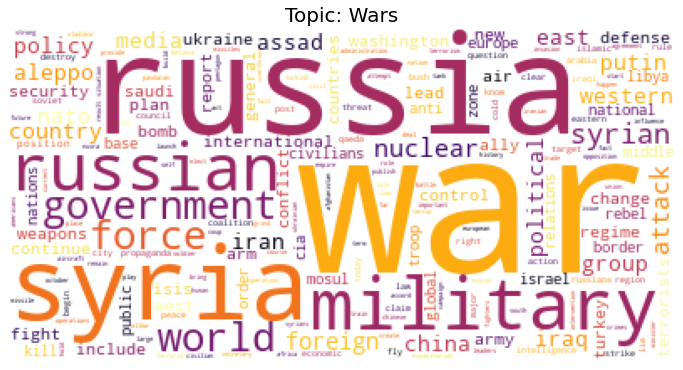

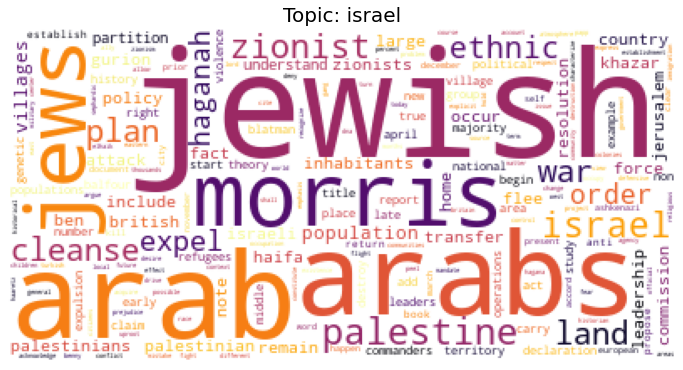

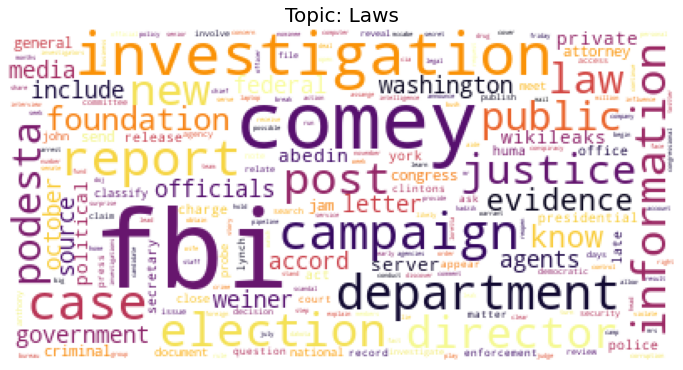

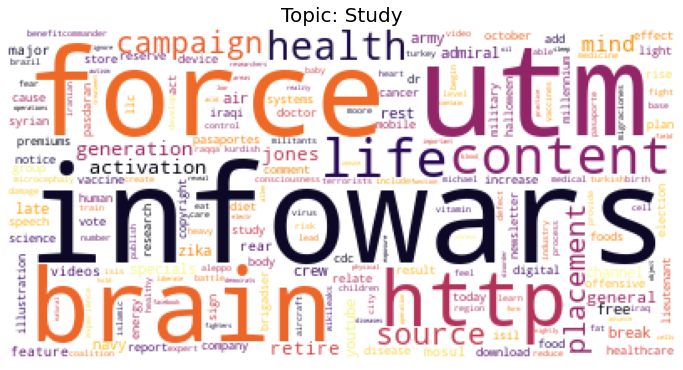

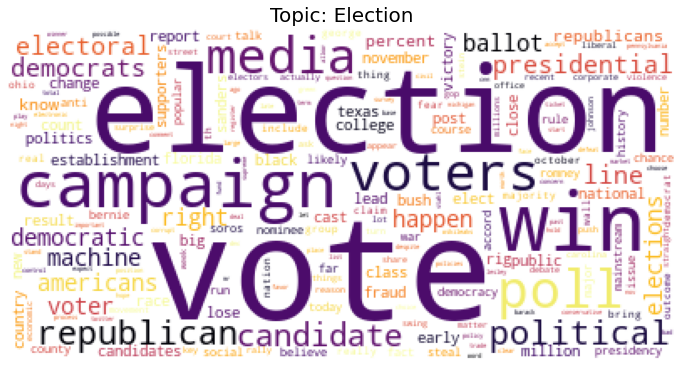

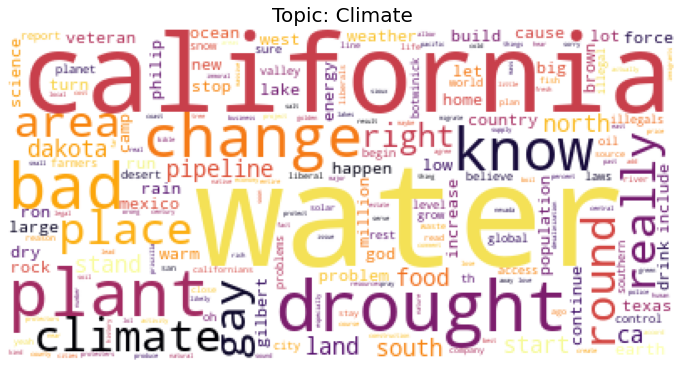

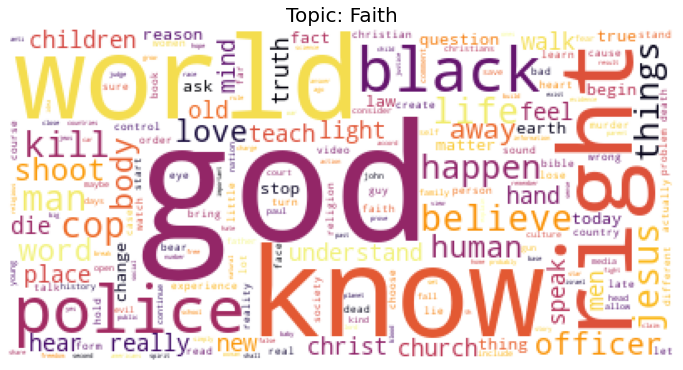

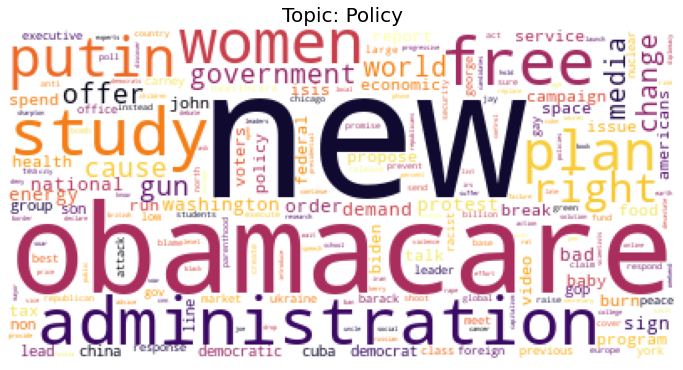

In [48]:
vocab=vectorizer.get_feature_names()
list_of_topics= ['Taxs','Financial','Wars','israel','Laws','Study',
                 'Election','Climate','Faith','Policy']
for topic in range(10):
    plt.figure(figsize = (12,14))
    plt.imshow(WordCloud(background_color='white', colormap=plt.cm.inferno).fit_words(dict(get_word_freq(topic, nmf_model, 200, vocab))))
    plt.axis('off')
    plt.title('Topic: ' + list_of_topics[topic], size=20)
    plt.show();

# Clustering

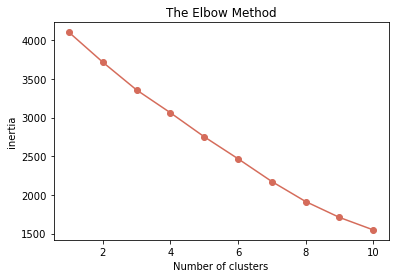

In [75]:
from sklearn.cluster import KMeans

inertia=[]
list_num_clusters=list(range(1,11))
for num_clusters in list_num_clusters:
    km=KMeans(n_clusters=num_clusters)
    km.fit(doc_topic)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters, inertia, color= '#D56C5B')
plt.scatter(list_num_clusters, inertia, color= '#D56C5B')
plt.title('The Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel("inertia");
plt.savefig('elbow')

# Apply Classification Algorithm

In [50]:
import nltk
df_neg.drop("Unnamed: 0", axis = 1, inplace = True)

df_post.drop("Unnamed: 0", axis = 1, inplace = True)

In [51]:
df_neg['target'] = 0 
df_post['target'] = 1

In [52]:
df= pd.concat([df_neg,df_post])
df.head()

text  target
0  ever feel life circle roundabout rather head s...       0
1  jackie mason voice reason exclusive clip breit...       0
2  paris france choose idealistic traditional can...       0
3  michael flynn resign security adviser seal pro...       0
4  organize action activist group morph barack pr...       0

In [53]:
X = df['text']
y= df['target']

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

aa  aab  aabb  aac  aachen  aadmi  aadvantage  aag  aah  aahhh  ...  zy  \
0   0    0     0    0       0      0           0    0    0      0  ...   0   
1   0    0     0    0       0      0           0    0    0      0  ...   0   
2   0    0     0    0       0      0           0    0    0      0  ...   0   
3   0    0     0    0       0      0           0    0    0      0  ...   0   
4   0    0     0    0       0      0           0    0    0      0  ...   0   

   zyaira  zybvwqhlbctginctv  zygankow  zylinderkopfdichtung  zytiga  zytsov  \
0       0                  0         0                     0       0       0   
1       0                  0         0                     0       0       0   
2       0                  0         0                     0       0       0   
3       0                  0         0                     0       0       0   
4       0                  0         0                     0       0       0   

   zyuganov  zyzs  zz  
0         0     0   0  
1         0     0   0  
2         0     0   0  
3         0     0   0  
4         0     0   0  

[5 rows x 105630 columns]

In [57]:
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head()

aa  aa aa  aa add  aa armament  aa ball  aa binghamton  aa birmingham  \
0   0      0       0            0        0              0              0   
1   0      0       0            0        0              0              0   
2   0      0       0            0        0              0              0   
3   0      0       0            0        0              0              0   
4   0      0       0            0        0              0              0   

   aa boxlayout  aa control  aa economic  ...  zytiga acquire  zytsov  \
0             0           0            0  ...               0       0   
1             0           0            0  ...               0       0   
2             0           0            0  ...               0       0   
3             0           0            0  ...               0       0   
4             0           0            0  ...               0       0   

   zytsov city  zyuganov  zyuganov mild  zyuganov surrender  zyzs  zyzs qxxk  \
0            0         0              0                   0     0          0   
1            0         0              0                   0     0          0   
2            0         0              0                   0     0          0   
3            0         0              0                   0     0          0   
4            0         0              0                   0     0          0   

   zz  zz akg  
0   0       0  
1   0       0  
2   0       0  
3   0       0  
4   0       0  

[5 rows x 2729702 columns]

In [58]:
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [59]:
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

In [66]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

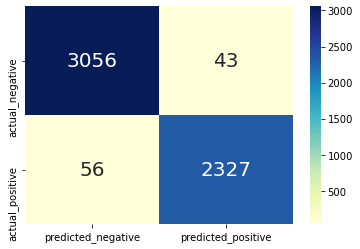

In [67]:
c1 = conf_matrix(y_test, y_pred_cv1)

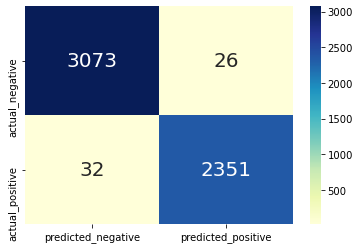

In [68]:
c2 = conf_matrix(y_test, y_pred_cv2)

In [69]:
results = pd.DataFrame(list(zip(c1, c2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1', 'LogReg2']
results

LogReg1  LogReg2
Accuracy     0.982    0.989
Precision    0.982    0.989
Recall       0.977    0.987
F1 Score     0.979    0.988

### naive_bayes

In [70]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [71]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv2, y_train)

y_pred_cv2_nb = bnb.predict(X_test_cv2)

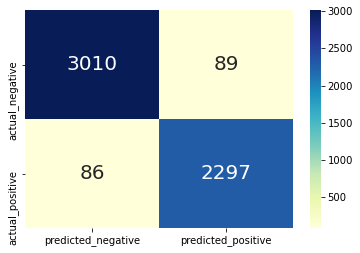

In [72]:
c3 = conf_matrix(y_test, y_pred_cv1_nb)

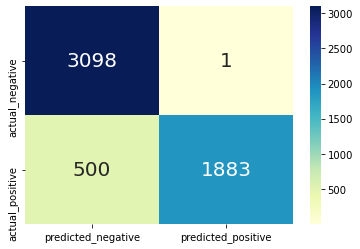

In [73]:
c4 = conf_matrix(y_test, y_pred_cv2_nb)

# Similarity_Measures

In [85]:
combos = df['text']

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df
cv = CountVectorizer()
X = cv.fit_transform(corpus)
pd.DataFrame(X.toarray(),columns=cv.get_feature_names())

target  text
0       0     1
1       1     0

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the document-term matrix with TF-IDF vectorizer
cv_tfidf = TfidfVectorizer(stop_words="english")
X_tfidf = cv_tfidf.fit_transform(corpus).toarray()
dt_tfidf = pd.DataFrame(X_tfidf,columns=cv_tfidf.get_feature_names())
dt_tfidf

target  text
0     0.0   1.0
1     1.0   0.0

In [91]:
tsne_clf_model = TSNE(n_components=3, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=111, angle=0.75)
tsne_clf_vectors = tsne_clf_model.fit_transform(lda)

ValueError: Expected 2D array, got scalar array instead:
array=LdaModel(num_terms=83990, num_topics=5, decay=0.5, chunksize=2000).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.